# On the determinism of financial time series

The Efficient Market Hypothesis (EMH) states that financial markets are efficient because the assets prices instantly reflect all the information about the issuing companies. The EMH admit three forms, to cite: I) the weak form, in which current prices reflect all information on the past prices; II) the strong form, in which the prices instantly reflect all the public and private information about the companies and III) the semi-strong form, that consider only the influence of public information on the prices of assets.

Whereas weak and strong forms of the EMH testify against the possibility of earnings above the market return through technical and fundamental analysis, respectively, the semi-strong form attributes to the investment analysts an important role on defining fair prices to the assets. However, the investors are assumed to be rational and any new information is supposed to be incorporated into the asset prices. Thus, the assets are correctly precified and any possibility of arbitrage corresponds only to vanishing disturbances in the market dynamics (SCHMIDT, 2005).

According to the EMH, the behavior of financial time series corresponds to random walks. This kind of process corresponds to a succession of random steps on a given mathematical domain. According to Small (2005), if financial time series were deterministic, the source of its determinism could be modeled yielding considerably profits through the commerce of assets. However, this method could be copied and, since all available information is known for all investment analysts, the profit would drop to zero. For this reason, it is pretty reasonable to assume that financial time series are stochastic.

In this work, the existence of deterministic behaviors in financial time series was evaluated through estimates of the Lyapunov exponents for several assets and indices in financial markets. According to Small (2005), given a model that represents reasonably well the dynamics of the system, the increase of the prediction error with the time horizon is related to the divergence between neighbor trajectories in phase space. And this divergence is measured by the Lyapunov exponents. Still according to Small (2005), one positive Lyapunov exponent is enough to assume the system as chaotic (and consequently the validity of any prediction is limited up to a time horizon).

The hypothesis of deterministic behaviors implies in the existence of an evolution operator $\Phi:\mathbb{R}\rightarrow\mathbb{R}$ such that $z_{t + 1} = \Phi(z_t)$, where $z_t$ is a $d_m$-dimensional vector that describes the state of process. For the purpose of defining the Lyapunov exponents, consider an attractor point $z_0$ and a neighbor attractor point $z_0 + \epsilon$ and $n$ successive iterations of the evolution operator, denoted as $\Phi^{(n)}(\cdot)$. If the behavior is chaotic, it is expected that the distance between the trajectories grow up exponentially with $n$. For instance, for the unidimensional case:
$$
\frac{d_n}{\epsilon} = \frac{||\Phi^{(n)}(z_0 + \epsilon) - \Phi^{(n)}(z_0)||}{\epsilon} = e^{\lambda n}
$$
or:
$$
\lambda = \frac{1}{n}\ln{\frac{||\Phi^{(n)}(z_0 + \epsilon) - \Phi^{(n)}(z_0)||}{\epsilon}}
$$
where $\lambda$ is the Lyapunov exponent of the system (HILLBORN, 2000). Although it can vary along the trajectory, a global Lyapunov exponent can be found by taking the limit when $n \rightarrow \infty$. For state vectors with $m > 1$, there is one Lyapunov exponent for each state variable, yielding a Lyapunov spectrum (where the rate of divergence is determined by the sum of the Lyapunov exponents). In this work, the Lyapunov exponents of financial time series were estimated from the data.

The libraries and classes imported below were used to analyze the Lyapunov exponents of financial time series. Between them, the nolds library was specially designed to deal with the dynamics of nonlinear systems.

In [1]:
import math
import nolds
import warnings
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')

mpl.rcParams['figure.figsize'] = (10, 7)
mpl.rcParams['axes.grid'] = True

## Takens' embedding

The analysis presented in this work were based in financial time series available in the Yahoo Finance website. The acquisition of the financial data is exemplified below with the Apple stock prices from the last decade. The dataset comprises the open, high, low and close prices from every session in the financial market.

In [2]:
start = '2012-01-01'
end = '2022-01-01'
symbol = 'AAPL'

stock_data = yf.Ticker(symbol)
stock_data = stock_data.history(start = start, end = end) 

stock_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03,12.519957,12.614759,12.507724,12.575920,302220800,0.0,0.0
2012-01-04,12.538301,12.681422,12.516283,12.643500,260022000,0.0,0.0
2012-01-05,12.689681,12.799772,12.619955,12.783871,271269600,0.0,0.0
2012-01-06,12.837085,12.928217,12.820266,12.917514,318292800,0.0,0.0
2012-01-09,13.012310,13.081118,12.885397,12.897018,394024400,0.0,0.0
...,...,...,...,...,...,...,...
2021-12-27,176.864657,180.190422,176.844694,180.100540,74919600,0.0,0.0
2021-12-28,179.930762,181.099272,178.302832,179.061859,79144300,0.0,0.0
2021-12-29,179.101809,180.400158,177.913321,179.151749,62348900,0.0,0.0


Although the close price time series exhibits a clear growing trend at long term, short time intervals present erratic behaviors that may be associated with chaotic (deterministic) dynamics. The Takens' embedding theorem states that if the process is stationary and there exists an observation function $g:\mathbb{R}\rightarrow\mathbb{R}$, furnishing the last observation of the process, $x_t = g(z_t)$, and if the number $d_e$ of observations is big enough, so the evolution of the sequence $(x_t, x_{t - \tau}, ..., x_{t - (d_e - 1)\tau})$ (where $\tau$ corresponds to the embedding lag) will be the same as the state vector $z_t$ (SMALL, 2005).

The minimum value of $d_e$ that enables an unambiguous description of the process dynamics is called embedding dimension. Both methods used in this work to estimate the predictability of the financial time series are based on the Takens' embedding theorem. However, this theorem requires the time series to be stationary, and this is not verified for the close price history of the Apple assets (the expected value of the time series has a growing trend).

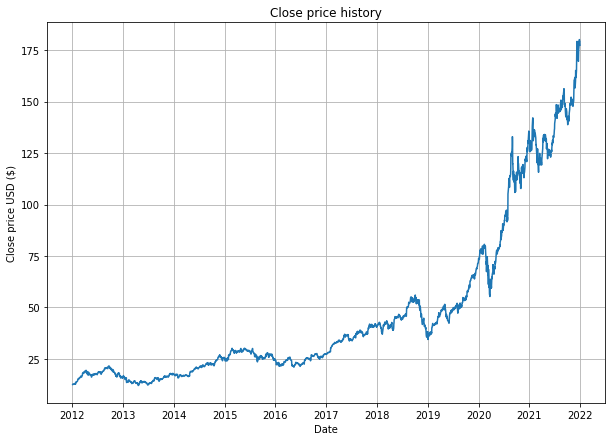

In [3]:
df = stock_data.loc[:, 'Close']

_ = plt.figure()
plt.title('Close price history')
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Close price USD ($)')
plt.show()

In order to deal with the aforementioned issue, the logarithm of the return between two subsequent moments, along the financial time series, was used. The log return of a time series $x_t$ is a measure of the efficiency of an investment and is given by:
$$
r_t = \ln{x_t} - \ln{x_{t - 1}}
$$
The former time series has statistical properties (e. g., a normal like distribution) that make its analysis more consistent when compared with the analysis of the stock prices. Two of them are a normal-like distribution and the stationarity with zero mean.

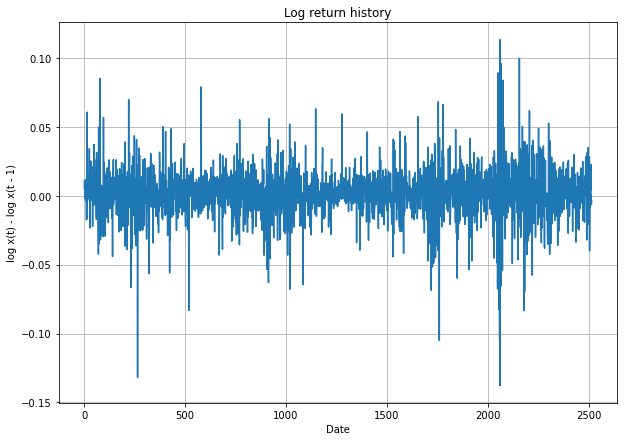

In [4]:
def log_return(data):
    log_return = list()
    
    for i in range(1, len(data)):
        log_return.append(np.log(data[i]/data[i - 1]))
        
    return pd.Series(log_return)

data = log_return(df)

_ = plt.figure()
plt.title('Log return history')
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('log x(t) - log x(t - 1)')
plt.show()

The stationarity of the time series $r_t$ can be verified through the Augmented Dickey-Fuller (ADF) test. The ADF test determines how well a time series is represented by a trend. For that, an autoregressive model with a unitary root (that is non-stationary) was used. The null hypothesis is that the time series has a unitary root, and the alternative hypothesis is that the time series is stationary.

The ADF test can be interpreted by means of a p-value. When $p > \delta$, where $\delta$ is a threshold, the test fails to reject the null hypothesis and the time series is assumed to be non-stationary. When $p \leq \delta$ the null hypothesis is rejected and the alternative hypothesis is assumed. As can be seen, for the analyzed data the null hypothesis can be rejected with more than 99% of accuracy.

In [5]:
res = adfuller(data)
print('ADF p-value: ', res[1])

ADF p-value:  3.519675758912321e-23


Before determining the embedding dimension $d_e$ of the log return time series, it is necessary to estimate the embedding lag $\tau$. Although there are no restrictions on the choice of this parameter, the shape of the embedded time series depends critically on it. Usually, the embedding lag is taken as the smallest positive integer $T$ for which the sample autocorrelation:
$$
\rho(T) = \frac{\sum_{t = 1}^N(y_{t + T} - \mu)(y_t - \mu)}{\sum_{t = 1}^N(y_t - \mu)^2}
$$
is smaller or equal to $1/e$ (decorrelation time). The term $\mu$ in the former equation corresponds to the expected value of the time series. This criterion is assumed to maximize the spread of the data in the phase space. It is possible to see that the sample autocorrelation of the log return time series presents a negative peak for $T$ = 1. Thereby, this value was assume as embedding lag $\tau$ in the further procedures.

<Figure size 720x504 with 0 Axes>

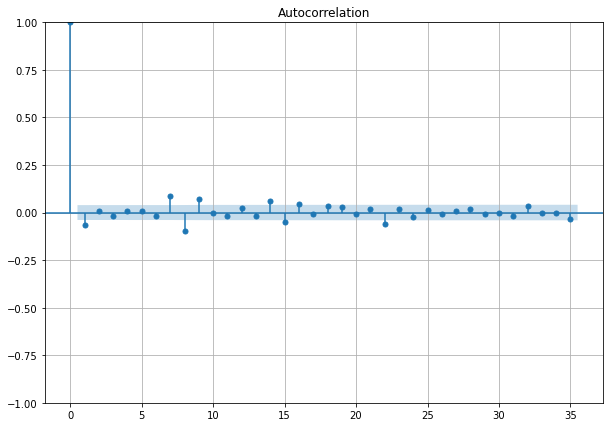

In [6]:
_ = plt.figure()
plot_acf(data)
plt.show()

The estimation of $d_e$, on its role, was made through the false nearest neighbors technique. This technique is based on embedding a scalar time series $y_t$ in phase spaces of increasingly higher dimensions. At each embedding, the number of pairs comprising the vectors:
$$
v_t = (y_{t - \tau}, y_{t - 2\tau}, \dots, y_{t - d\tau})
$$
and their nearest neighbors:
$$
v_t^{NN} = (y_{t' - \tau}, y_{t' - 2\tau}, \dots, y_{t' - d\tau})
$$
is compared. Small (2005) cites that true neighbors become close due to the system dynamics and separate considerably slowly as the embedding dimension increases. False neighbors, on the other hand, may become close in $\mathbb{R}^n$ because the embedding produced trajectories that cross, rather than due to the system dynamics. In this situation a pair of vectors $v_t$ and $v_t^{NN}$ may be close when embedded in $\mathbb{R}^n$ but not close when embedded in $\mathbb{R}^{n + 1}$.

Consider a pair of vectors $v_t$ and $v_t^{NN}$, embedded in $\mathbb{R}^n$, and the following embedding in $\mathbb{R}^{n + 1}$:
$$
\hat{v}_t = (y_{t - \tau}, y_{t - 2\tau}, \dots, y_{t - n\tau}, y_{t - (n + 1)\tau})
$$
$$
\hat{v}_t^{NN} = (y_{t' - \tau}, y_{t' - 2\tau}, \dots, y_{t' - n\tau}, y_{t' - (n + 1)\tau})
$$
Since the increasing in the distance depends on the componends added in the last embedding:
$$
||\hat{v}_t - \hat{v}_t^{NN}||^2 - ||v_t - v_t^{NN}||^2 = (y_{t - (n + 1)\tau} - y_{t' - (n + 1)\tau})^2
$$
it is possible to determine if two points are true or false neighbors by comparing the normalized increasing with a given parameter $R_T$:
$$
\frac{|y_{t - (n + 1)\tau} - y_{t' - (n + 1)\tau}|}{||v_t - v_t^{NN}||} \geq R_T
$$
The parameter $R_T$ is, usually, set in the interval $10 \leq R_T \leq 30$. Values below this interval increase the chance of counting true neighbors as false neighbors, while values above it the chance of counting false neighbors as true neighbors (SMALL, 2005).

In this work, the parameter $R_T$ was set to 10. The following code cell presents the functions defined to perform the embedding of the time series and to calculate the number of false nearest neighbors for each embedding. The sklearn.neighbors.NearestNeighbors() class was employed to obtain the pairs of vectors $v_t$ and $v_t^{NN}$.

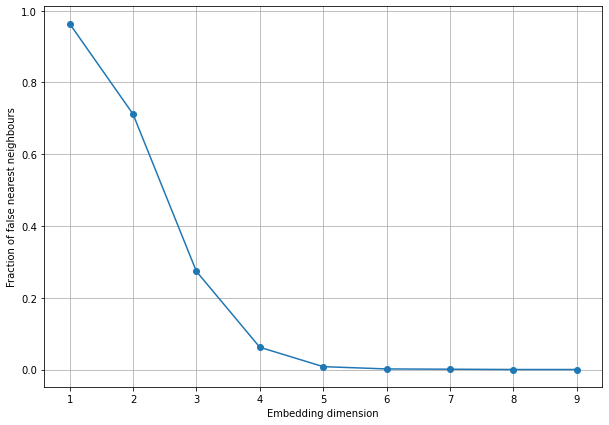

In [7]:
def takens_embedding(data, lag, emb_dim):   
    emb_data = np.array([data[0:len(data) - lag*emb_dim]])
    
    for i in range(1, emb_dim):
        emb_data = np.append(
            emb_data,
            [data[i*lag:len(data) - lag*(emb_dim - i)]],
            axis=0)
        
    return emb_data

def false_nn(data, lag, emb_dim):
    emb_data = takens_embedding(data, lag, emb_dim)
    
    neighbors = NearestNeighbors(
        n_neighbors = 2,
        algorithm = 'auto').fit(emb_data.transpose())
    distances, indices = neighbors.kneighbors(emb_data.transpose())
    
    eps = np.std(distances.flatten())
    n_false_nn = 0
    
    for i in range(0, len(data) - lag*(emb_dim + 1)):
        if (0 < distances[i, 1]) and (
            distances[i, 1] < eps) and (
            (abs(data[i + emb_dim*lag] - data[indices[i, 1] +
                 emb_dim*lag])/distances[i, 1]) > 10):
            n_false_nn += 1
            
    return n_false_nn

emb_dim = range(1, 10)
n_false_nn = [false_nn(data, 1, i)/len(data) for i in emb_dim]

_ = plt.figure()
plt.plot(emb_dim, n_false_nn, 'o-')
plt.xlabel('Embedding dimension')
plt.ylabel('Fraction of false nearest neighbours')
plt.show()

As can be seen in the former figure, the fraction of false nearest neighbors drops to zero and remains unchanged for embedding dimension $d_e \geq 6$. Thus, it was assumed that the dynamics of the time series $r_t$ can be unambiguously described with an embedding dimension of $d_e = 6$. The attractor respective to this embedding is portrayed in the next three-dimensional plots. In order to visualize the six-dimensional attractor, in each plot two of the coordinate axis are keep unchanged, while the third one varies between the remaining dimensions.

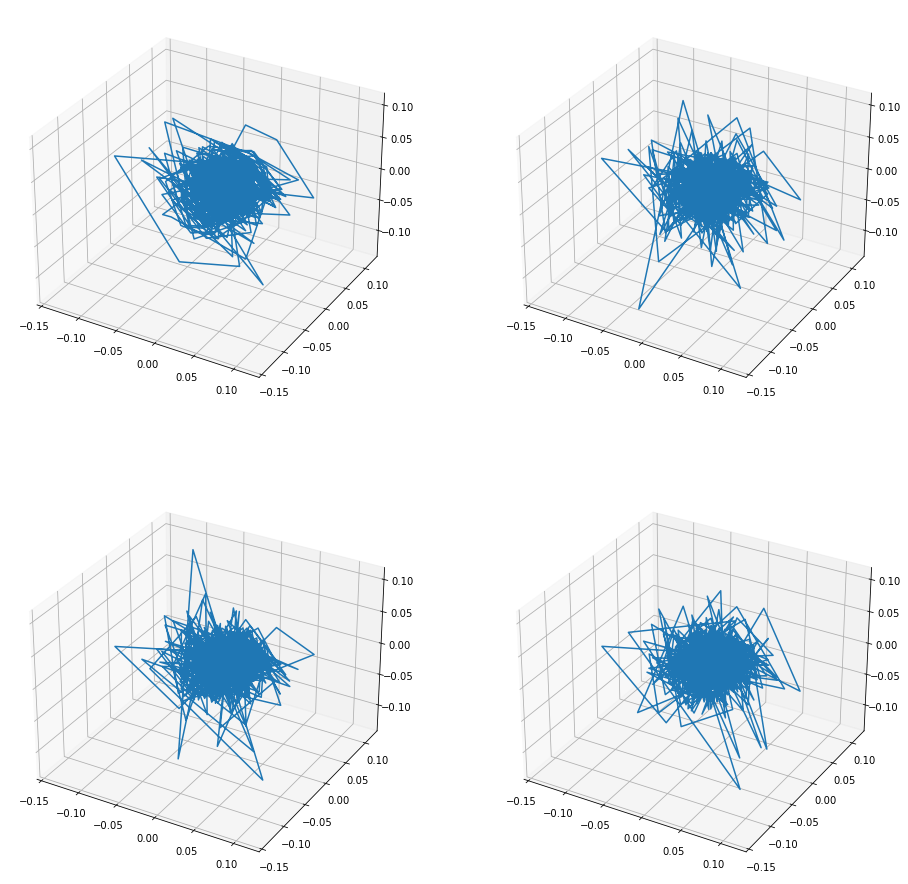

In [8]:
embed_data = takens_embedding(data, 1, 6)

fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(2, 2, 1, projection = '3d')
ax.plot(embed_data[0, :], embed_data[1, :], embed_data[2, :])
ax = fig.add_subplot(2, 2, 2, projection = '3d')
ax.plot(embed_data[0, :], embed_data[1, :], embed_data[3, :])
ax = fig.add_subplot(2, 2, 3, projection = '3d')
ax.plot(embed_data[0, :], embed_data[1, :], embed_data[4, :])
ax = fig.add_subplot(2, 2, 4, projection = '3d')
ax.plot(embed_data[0, :], embed_data[1, :], embed_data[5, :])
plt.show()

The presented procedure was used in the next section to determine the embedding lag and embedding dimension of the log return of another financial time series. These results were employed while estimating the Lyapunov exponents of the log return time series.

## Predictability of the time series

The calculation of the Lyapunov spectrum comprehends the computation of the Jacobian matrices of the transformation $z_{t + 1} = \Phi(z_t)$. The logarithms of the eigenvalues of the product of these matrices, along a trajectory, furnish the Lyapunov exponents. However, this procedure requires the evolution operator $\Phi(\cdot)$ to be known with sufficient accuracy. Since the hypothetical deterministic dynamics in financial time series are unknown, this work addressed the estimative of the Lyapunov exponents from the data.

As far as a positive Lyapunov exponent is a strong indicative of chaos, it is of interest to calculate this exponent for a given time series. The Rosenstein's method is able to recover the largest Lyapunov exponent when it is positive. In order to describe the method, consider a vector $v_t$ and its nearest neighbor $v_t^{'}$, in the phase space, and the Euclidian distance between them:
$$
d_t(0) = ||v_t - v_t^{'}||
$$
Since the largest Lyapunov exponent is an average of the local divergence rates between neighbor trajectories, by assuming $\lambda$ as a good approximation of the largest Lyapunov exponent (i. e., the exponent that dominates the aforementioned divergence), it is possible to say that the average distance between close neighbors increases according to the power law:
$$
d_{avg}(k) = d_{avg}(0)e^{\lambda k}
$$
After taking the logarithm of the former equation, we have:
$$
\ln{d_{avg}(k)} = \ln{d_{avg}(0)} + \lambda k
$$
Thus, if the logarithm of the average distance $\ln{d_{avg}(k)}$ exhibits a robust linear increase for some range of $k$, its slope is an estimate of the maximum Lyapunov exponent. The value of $\lambda$ can be obtained from a linear fit of $\ln{d_{avg}(k)}$ in function of the time step $k$ (MEHDIZADEH, 2019).

The nolds.lyap_r() function was used to obtain the  $\ln{d_{avg}(k)}$ curve for the log return time series $r_t$ of the Apple stock prices, with embedding dimension $d_e = 6$ and embedding lag $\tau = 1$. Nonetheless, it is possible to see that the function may fail to estimate the largest Lyapunov exponent from the slope of the curve  $\ln{d_{avg}(k)}$. The next figure exemplifies this. Although a robust linear increase is visible only up to $k = 5$, the nolds.lyap_r() function fitted a linear model considering the range up to $k = 20$. This results in a poor estimate of the exponent $\lambda$.

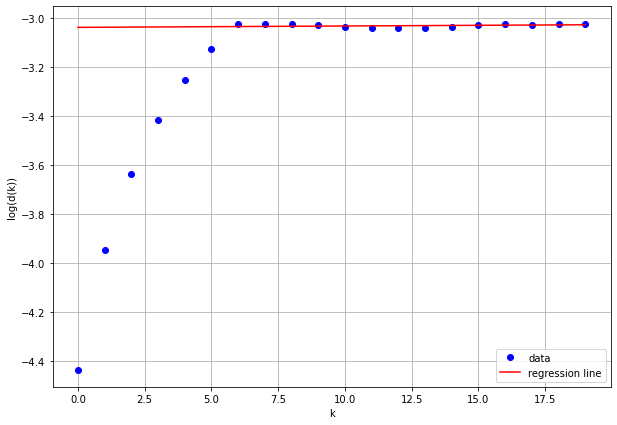

In [9]:
res = nolds.lyap_r(data, emb_dim = 6, lag = 1, min_tsep = 0,
                   debug_data = True, debug_plot = True)

In order to fix the former issue, only the linear increasing regime was considered. As a criterion for this, only the samples satisfying:
$$
\frac{\ln{d_{avg}(k + 1) - \ln{d_{avg}(k)}}}{\ln{d_{avg}(k)}} > 0.05
$$
were addressed in the linear fitting approach. The regression line in the following figure was obtained through the least squares method, and furnishes a better estimate of the slope of the linear increase (and consequently of the largest Lyapunov exponent). The respective Lyapunov exponent is approximately 0.2891.

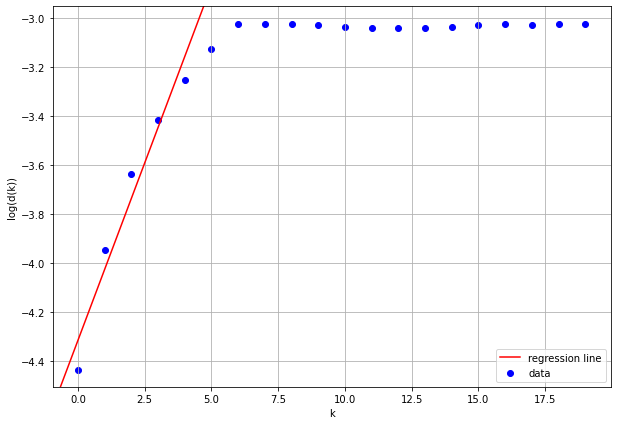

In [10]:
def lyap_r(indices, distances, debug_plot = True):
    k = indices.copy()
    d = distances.copy()
    
    n = len(distances)
    res = (distances[1:] - distances[:(n - 1)])/distances[1:]
    res = np.insert(res, 0, 1)
    k = k[np.abs(res) > .05].reshape(-1, 1)
    d = d[np.abs(res) > .05].reshape(-1, 1)
    
    reg = LinearRegression().fit(k, d)
    coeff = reg.coef_[0][0]
    intercept = reg.intercept_[0]
    
    if(debug_plot):
        x = np.linspace(0, np.max(k))
        
        _ = plt.figure()
        plt.scatter(indices, distances, color = 'b',
                    label = 'data')
        plt.axline((0, intercept), slope = coeff, color = 'r',
                   label = 'regression line')
        plt.legend(loc = 'lower right')
        plt.xlabel('k')
        plt.ylabel('log(d(k))')
        plt.show()
    
    return coeff
    
lyap_exp = lyap_r(res[1][0], res[1][1])

The time interval in which two neighbor trajectories diverge by a factor of $e$ is called Lyapunov time. The Lyapunov time is the time scale in which the system behavior becomes chaotic and, as consequence, establishes a limit on the predictability of the system dynamics. When the system is chaotic, its value can be estimated as the inverse of the largest Lyapunov exponent. For the analyzed time series, the Lyapunov time is approximately 3.458 time steps. This means that predictions comprising 3 sessions (of the financial market) ahead would diverge, at least, by a factor of $e$ from the respective log return time series.

In [11]:
print('Lyapunov time: ', 1/lyap_exp)

Lyapunov time:  3.458043060975704


In despite of its simplicity, the Rosenstein method cannot estimate the whole Lyapunov spectrum and is not robust to different parameter choices. Both issues can be overcome by means of the Eckmann method. Before enunciating the Eckmann method, consider the neighborhood of a coordinate $y_t$, in phase space, whose evolution is governed by $y_{t + 1} = F(y_t)$. When $y_t$ is submitted to a small perturbation $\Delta_t$, its trajectory can be analyzed in terms of the linearized dynamics:
$$
y_{t + 1} + \Delta_{t + 1} \approx F(y_t + \Delta_t) \approx J_F(y_t)\cdot\Delta_t + F(y_t)
$$
or:
$$
\Delta_{t + 1} \approx J_F(y_t)\cdot\Delta_t
$$
where $J_F(y_t)$ is the Jacobian matrix of the evolution operator $F(\cdot)$. According to Abarbanel (1996), the stability of the orbit around $y_t$ depends on evolution of $\Delta_t$ as the number of time steps grow. After $L$ time steps, we have:
$$
\Delta_{t + L} = J_F^L(y_t)\cdot\Delta_t = J_F(y_{t + L - 1})\cdot J_F(y_{t + L -2})\cdot\dots\cdot J_F(y_t)\cdot\Delta_t
$$
where $J_F^L(y_t)$ represents the composition of the $L$ Jacobian matrices.

By assuming that the eigenvalues of the matrix $J_F^L(y_t)$ have exponential behavior on time (i. e. $e^{\lambda L}$), it is possible to say that a exponent $\lambda > 0$ makes the orbit unstable and lead to chaotic behaviors. Since the vector $y_t$ is time dependent, the stability of its orbit can be analyzed through the multiplicative ergodic theorem, attributed to the Russian mathematician Oseledec. This theorem states that, being the square of the disturbance $\Delta_{t + L}$:
$$
||\Delta_{t + L}||^2 = \Delta_L^t\cdot{\Big (}J_F^L(y_t){\Big )}^t\cdot J_F^L(y_t)\cdot\Delta_t
$$
then the limit:
$$
\lim_{L \rightarrow \infty} \text{OSL}(y_t, L) = \lim_{L \rightarrow \infty} {\bigg [}{\Big (}J_F^L(y_t){\Big )}^t\cdot J_F^L(y_t){\bigg ]}^{1/2L}
$$
exists and is independent of all $y_t$ in the basin of attraction of the attractor to which the orbit belongs. Thus, the logarithms of the eigenvalues of the Oseledec matrix $\text{OSL}(y_t, L)$ are equal to the Lyapunov spectrum of the system state described by $y_{t + 1} = F(y_t)$. However, the calculation of these eigenvalues is an easy task, since the Oseledec matrix becomes ill-conditioned for large $L$ (ABARBANEL, 1996).

Eckman et al. (1986) propose the recursive QR decomposition of the Oseledec matrix to solve this problem. For that, the $2L$-th power of the Oseledec matrix is represented as a matricial product $T(2L)\cdot T(2L - 1)\cdot\dots T(1)$, where each matrix $T(j)$ has the decomposition:
$$
T(j)\cdot Q(j - 1) = Q(j)\cdot R(j)
$$
with $Q(0) = I$ (the identity matrix). This decomposition is analogous to the polar decomposition of a complex number, with the orthogonal matrix $Q(j)$ representing its phase and the upper triangular matrix $R(j)$ representing its magnitude. Thus, the Oseledec matrix can be rewritten as:
$$
\text{OSL}(y_t, L) = T(2L)\cdot T(2L - 1)\cdot\dots T(1) = Q(2L)\cdot R(2L)\cdot R(2L - 1)\cdot\dots R(1)
$$
It can be shown that the eigenvalues of the Oseledec matrix are given by the values along the diagonal of the product of the upper triangular matrices. Thereby, the Lyapunov exponents are given by:
$$
\lambda_a = \lim_{L \rightarrow \infty} \frac{1}{2L}\sum_{k = 1}^{2L}\ln{R_{aa}(k)}
$$
More detailed descriptions of the Eckmann method can be found in Eckmann et al. (1986) and in Abarbanel (1996). In this work, its implementation in the nolds.lyap_e() function was used to calculate the Lyapunov exponents of the log return time series.

The Eckmann method also requires the dimension of the deterministc state, with the restriction given by:
$$
d_e - 1 = m(d_m - 1), \text{ } m \in \mathbb{N}
$$
Since the embedding dimension found through the false nearest neighbors method was $d_e$ = 6, the matrix dimension $d_m$ can be only 1 or 6. In this work it was assumed that $d_e = d_m$. The next plot presents the estimates of the Lyapunov exponents together with their respective uncertainties. It is possible to see that three of them have positive expected value. This is a good indicative of chaos in the financial time series.

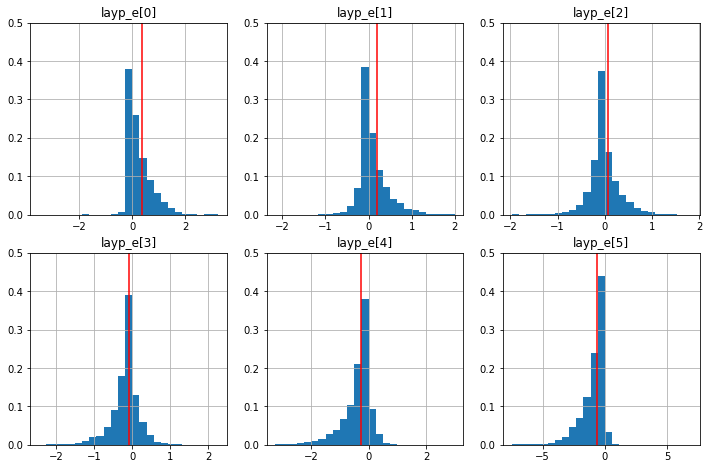

In [12]:
lyap_exp = nolds.lyap_e(data, emb_dim = 6, matrix_dim = 6, debug_plot = True)

The Lyapunov time associated with the largest Lyapunov exponent is about 2.657. This value is close to the Lyapunov time obtained by means of the Rosenstein method, and implies that the predictability limit is up to 3 financial market sessions. After this, any prediction will diverge from the real trajectories, in phase space, by a factor of $e$.

The sum of the Lyapunov exponents ($\sum_i\lambda_i$ = -0.3787) reveals that the system is dissipative. This means that volumes in phase space, comprising solutions to the equation $y_{t + 1} = F(y_t)$, contract with time, giving rise to a bounded set (an attractor). However, due to the positive Lyapunov exponents, the trajectories in phase space happen in an aperiodic way and do not converge to a fixed point. Consequently, this bounded set corresponds to a strange attractor.

In [13]:
print('Lyapunov time: ', 1/np.max(lyap_exp))
print('Sum of the Lyapunov exponents: ', np.sum(lyap_exp))

Lyapunov time:  2.651625650658943
Sum of the Lyapunov exponents:  -0.37811264


The Rosenstein and Eckmann methods were repeated to another financial time series, according to the steps presented in the former and current sections. In each one of the results in the next section, the chosen embedding dimension $d_e$ was the smaller dimension with less than 0.5% of false nearest neighbors. In the application of the Eckmann method, the matrix dimension was assumed to be equal to the embedding dimension (i. e., $d_m = d_e$).

## Results and discussion

The dyn_inv() function summarizes the analysis presented in the last two sections. It was defined with the purpose of reproducing it to another financial time series. The function takes stationary time series and returns its embedding lag, embedding dimension, Lyapunov time (according to the Rosenstein and Eckmann methods) and the sum of the Lyapunov exponents (Eckmann method).

In [14]:
def dyn_inv(data):
    emb_lag = 0
    
    while(data.autocorr(emb_lag) > 1/np.e):
        emb_lag += 1
        
    emb_dim = range(1, 10)
    n_false_nn = [false_nn(data, 1, i)/len(data) for i in emb_dim]
    
    emb_dim = emb_dim[next(x for x, val in enumerate(n_false_nn) if(val < .005))]
    
    res = nolds.lyap_r(data, emb_dim = emb_dim, lag = emb_lag,
                       min_tsep = 0, debug_data = True)
    lyap_exp = lyap_r(res[1][0], res[1][1], debug_plot = False)
    lyap_r_time = 1/lyap_exp
    
    lyap_exp = nolds.lyap_e(data, emb_dim = emb_dim, matrix_dim = emb_dim)
    lyap_e_time = 1/np.max(lyap_exp)
    contract_rate = np.sum(lyap_exp)
    
    return emb_lag, emb_dim, lyap_r_time, lyap_e_time, contract_rate

The set of financial time series addressed in this work comprises stock prices of technology companies, stock prices of food companies, indices of financial markets and the monetary value of gold and some cryptocurrencies (in dollars). Most of the respective financial time series come from efficient markets. Although the efficiency of the markets of cryptocurrencies is still a subject of discussion, there are evidences that this market has become increasingly more efficient in the last years (TRAN; LEIRVIK, 2020).

All the considered cases presented embedding lag $\tau$ = 1, according to the decorrelation time criterion. The embedding dimension varied between 5 and 7 sessions. This means that the variances of the log returns in the analyzed time series can be unambiguously explained by taking into account previous values from the same week. As can be seen, the existence of positive Lyapunov exponents was confirmed for all the time series. Thus, they are chaotic and any prediction approach is limited up to a time horizon. Whereas the Rosenstein method estimated prediction horizons from 3 to 5 market sessions, the Eckmann method estimated prediction horizons from 2 to 3 market sessions. However, these predictions were close (differing in 1 session) for most time series, exhibiting a bigger difference only to the cryptocurrencies. 

In [15]:
symbols = ['AAPL', 'MSFT', 'AMZN', 'TSLA', 'NVDA', 'FB',
           'COKE', 'NSRGY', 'KHC', 'PEP', 'K',
           'SPY', 'DJI', '^BVSP', '^IXIC', '^MERV',
           'GC=F', 'BTC-USD', 'ETH-USD', 'DOGE-USD']

columns = [
    'Name',
    'Embedding lag',
    'Embedding dimension',
    'Lyapunov time (Rosenstein)',
    'Lyapunov time (Eckmann)',
    'Sum of the Lyapunov exponents'
]

res = []

for symbol in symbols:
    stock_data = yf.Ticker(symbol)
    stock_data = stock_data.history(start = start, end = end) 
    df = stock_data.loc[:, 'Close']
    
    tmp = []
    tmp.append(symbol)
    tmp.extend(dyn_inv(log_return(df)))
    res.append(tmp)
    
res = pd.DataFrame(res, columns = columns)

res

,Name,Embedding lag,Embedding dimension,Lyapunov time (Rosenstein),Lyapunov time (Eckmann),Sum of the Lyapunov exponents
0,AAPL,1,6,3.458041,2.651184,-0.378006
1,MSFT,1,7,3.830409,3.205348,-0.521379
2,AMZN,1,6,3.479998,2.618720,-0.372979
3,TSLA,1,7,4.278410,3.186409,-0.525814
4,NVDA,1,6,3.469728,2.739973,-0.325207
5,FB,1,6,3.542917,2.683498,-0.404060
6,COKE,1,7,3.824962,2.978786,-0.500186
7,NSRGY,1,5,2.369304,2.093269,-0.153833
8,KHC,1,6,3.274119,2.571582,-0.391540
9,PEP,1,6,3.022220,2.677498,-0.316314


All the log return time series presented similar dynamic invariants. The average over the sums of the Lyapunov exponents was about -0.398, with standard deviance of 0.0882. This means that the volumes comprising solution flows in the phase spaces associated with the time series contract with time. Since these time series exhibit chaotic behaviors, the solutions of the state equation $z_{t + 1} = \Phi(z_t)$ belong to the basins of attraction of strange attractors.

In [16]:
columns.remove('Name')
res[columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Embedding lag,20.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Embedding dimension,20.0,6.200000,0.523148,5.000000,6.000000,6.000000,6.250000,7.000000
Lyapunov time (Rosenstein),20.0,3.524990,0.740113,2.369304,3.068987,3.463885,3.826324,5.656442
Lyapunov time (Eckmann),20.0,2.767990,0.259994,2.093269,2.645205,2.715607,2.952477,3.205348
Sum of the Lyapunov exponents,20.0,-0.398162,0.088179,-0.534843,-0.430585,-0.388902,-0.358171,-0.153833


It is possible to see that prediction horizons associated with financial time series comprise short time scales. In some cases, nearby trajectories diverge by a factor of $e$ after two market sections. So, in the best hypothesis a model consistent with the market dynamics would be able to accurately predict only the log return of the next session in this market. This situation is very close to the one described by a random walk process, in which the prediction horizon would be zero. In this last scenario, only the probability of the time series assuming a given value can be estimated rather than a deterministic state itself. Thereby, it is possible to say, in accordance with the observed data, that the EMH is a reasonable hypothesis about market dynamics.

## Conclusions

The analysis of the Lyapunov exponents showed that the addressed financial time series have short prediction horizons, comprising (mostly) two to three market sessions. This result is similar to the scenario assumed by the efficient market hypothesis, giving support to it. Between the main conclusions of this work it is possible to list:

* The log return time series presented embedding lag $\tau$ = 1 and embedding dimension from 5 to 7. Thus, the evolution of the log return values can be unambiguously understood in terms of the previous values in the same week.
* The Rosenstein method indicated that the largest Lyapunov exponent of the analyzed time series are positive, yielding a chaotic behavior.
* The Eckmann method demonstrated that some financial time series may have more than one positive Lyapunov exponent, being hyperchaotic.
* According to sum of the Lyapunov exponents, the analyzed financial markets behave like dissipative systems with solution flows in the basin of attraction of strange attractors.

## References

ABARBANEL, H. D. I. **Analysis of Chaotic Time Series**. Springer: New York (USA), 1996.

ECKMANN, J. P.; KAMPHORST, S. O; RUELLE, D.; CILIBERTO, S. Liapunov exponents from time series. **Physical Review A**, v. 34, n. 6, p. 4971-4979, 1986.

HILLBORN, R. C. **Chaos and Nonlinear Dynamics**: An Introduction for Scientists and Engineers. 2 ed. Oxford Press: Oxford (UK), 2000.

MEHDIZADEH, S. A robust method to estimate the largest Lyapunov exponent of noisy signals: A revision to the Rosenstein’s algorithm. **Journal of Biomechanics**, v. 85, p. 84-91, 2019.

SCHMIDT, A. B. **Quantitative Finance for Physicists**: An Introduction. Elsevier: San Diego (USA), 2005.

SMALL, M. **Applied Nonlinear Time Series Analysis**: Applications in Physics, Phisiology and Finance. World Scientific: Toh Tuck Link (SIN), 2005.

TRAN, V. L.; LEIRVIK, T. Efficiency in the markets of crypto-currencies. **Finance Research Letters**, v. 35, 2020.